## Workplace Sexual Harrassment
#### By Xinyi Zhu and Yunji Wu
This statistics project takes the dataset of workplace sexual harrassment reports in the year of 2016, broken down by major industries. By studying the information in the given dataframes, our questions are raised as to whether or not factors like average hourly earnings and women workface have played big roles in the ocurrence of sexual harrassment at workplace.

The first csv file we imported provides the economic data we need for each industry. The original sheet contains much more columns but here we only need those that are pertinent to the topics of this project, which are average hourly earnings, female workforce and total workforce.

In [1]:
import pandas as pd
data1 = pd.read_csv('d3_information_naics_bls_info.csv')
data1 = data1[['industry','avg_hrly_earnings','women_percentage','total_employment']]
data1.head()

,industry,avg_hrly_earnings,women_percentage,total_employment
0,Accommodation and Food Services,14.10,0.527273,13449.20
1,Retail Trade,15.44,0.406632,15982.52
2,Other Services (except Public Administration),19.41,0.525578,4078.80
3,Wholesale Trade,29.73,0.296180,5877.50
4,Manufacturing,24.39,0.274534,12337.52


The second csv file we imported provides the claim data we need for each industry.

In [2]:
data2 = pd.read_csv('d3_claims_by_sector.csv')
data2 = data2[['industry','claims_2016','claims_total']]
data2.head()

,industry,claims_2016,claims_total
0,"Agriculture, Forestry, Fishing and Hunting",23,950
1,"Mining, Quarrying, and Oil and Gas Extraction",8,700
2,Utilities,9,693
3,Construction,46,3070
4,Manufacturing,261,14053


Merge the two datasets based on the common industry column and calculate the sexual harrassment rate.

In [3]:
df = pd.merge(data1, data2, on="industry",how = 'left')
df['SH rate'] = df['claims_2016'] / df['total_employment']
df.head()

,industry,avg_hrly_earnings,women_percentage,total_employment,claims_2016,claims_total,SH rate
0,Accommodation and Food Services,14.10,0.527273,13449.20,237,14208,0.017622
1,Retail Trade,15.44,0.406632,15982.52,217,14119,0.013577
2,Other Services (except Public Administration),19.41,0.525578,4078.80,41,3403,0.010052
3,Wholesale Trade,29.73,0.296180,5877.50,44,2287,0.007486
4,Manufacturing,24.39,0.274534,12337.52,261,14053,0.021155


We want to add another column as a index value to indicate the level of the wage. So we need another dataset to tell us the average hourly wage of year 2016.

In [4]:
import xlrd
df_wage = pd.read_excel('average_wage.xlsx')
df_wage.head(5)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2008,17.74,17.80,17.88,17.92,17.98,18.04,18.10,18.18,18.20,18.25,18.32,18.38
1,2009,18.40,18.45,18.50,18.52,18.53,18.56,18.60,18.66,18.70,18.74,18.81,18.84
2,2010,18.89,18.92,18.92,18.96,19.01,19.03,19.05,19.10,19.11,19.20,19.21,19.22
3,2011,19.32,19.32,19.31,19.36,19.41,19.42,19.48,19.48,19.49,19.56,19.56,19.56
4,2012,19.58,19.60,19.65,19.69,19.68,19.72,19.75,19.74,19.79,19.79,19.85,19.89


From the data above, we have the average hourly wage of year 2016 to be 21.55.

In [5]:
# set the wage level index for each industry
df.loc[df['avg_hrly_earnings'] >= 21.55, 'wage_level'] = 1
df.loc[df['avg_hrly_earnings'] < 21.55, 'wage_level'] = 0

In [6]:
df = df.dropna()
df.head()

,industry,avg_hrly_earnings,women_percentage,total_employment,claims_2016,claims_total,SH rate,wage_level
0,Accommodation and Food Services,14.10,0.527273,13449.20,237,14208,0.017622,0.0
1,Retail Trade,15.44,0.406632,15982.52,217,14119,0.013577,0.0
2,Other Services (except Public Administration),19.41,0.525578,4078.80,41,3403,0.010052,0.0
3,Wholesale Trade,29.73,0.296180,5877.50,44,2287,0.007486,1.0
4,Manufacturing,24.39,0.274534,12337.52,261,14053,0.021155,1.0


We also want to add another column as a index value to indicate the level of the women workforce.

In [7]:
# set the women workforce level index for each industry
df.loc[df['women_percentage'] >= 0.5, 'women_percentage_level'] = 1
df.loc[df['women_percentage'] < 0.5, 'women_percentage_level'] = 0

In [8]:
df = df.dropna()
df.head()

,industry,avg_hrly_earnings,women_percentage,total_employment,claims_2016,claims_total,SH rate,wage_level,women_percentage_level
0,Accommodation and Food Services,14.10,0.527273,13449.20,237,14208,0.017622,0.0,1.0
1,Retail Trade,15.44,0.406632,15982.52,217,14119,0.013577,0.0,0.0
2,Other Services (except Public Administration),19.41,0.525578,4078.80,41,3403,0.010052,0.0,1.0
3,Wholesale Trade,29.73,0.296180,5877.50,44,2287,0.007486,1.0,0.0
4,Manufacturing,24.39,0.274534,12337.52,261,14053,0.021155,1.0,0.0


In [9]:
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

/Users/yunjiwu/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


So far we have finished the data cleaning part. And here begins the statistics part.

#### 1. Is there a difference between the sexual harrassment rate obserbed in low-wage industries and that in high-wage industries?


We want to investigate whether there is a difference between the sexual harrassment rate obserbed in low-wage industries and that in high-wage industries.<br/> This data is in the variable SH rate with grouping variable wage_level. <br> A "1.0" wage_level represents high-wage and a "0.0" wage_level represents low-wage. 

In [10]:
# Descriptive statistics by group 
df['SH rate'].groupby(df['wage_level']).describe()

,count,mean,std,min,25%,50%,75%,max
wage_level,,,,,,,,
0.0,6.0,0.022070,0.016544,0.010052,0.014545,0.017535,0.018288,0.055209
1.0,14.0,0.014138,0.005337,0.006879,0.010809,0.012342,0.017158,0.024505


Let $\mu_1$ be the population mean of sexual harrassment rate for low wage industries ($X_1,...,X_{6}$) and $\mu_2$ be the population mean for high wage industries ($Y_1,...,Y_{14}$) respectively. 
<br>If $\delta = \mu_1 - \mu_2$, then we consider the test 
$$ H_0 : \delta = 0, \qquad vs \qquad H_1: \delta \ne 0$$ 
Note that the sampling distribution of a difference in sample means from independent samples is approximately normal <br> 
The non-parametric estimate of $\delta$ is $\hat{\delta} = \bar{X} - \bar{Y}$ with estimated standard error 
$$ \hat{se} = \sqrt{\frac{{s_1}^2}{6} + \frac{{s_2}^2}{14}} $$
where ${s_1}^2$ and ${s_2}^2$ are the sample variances. 

The Wald statistics is given by 
$$ W = \frac {\hat{\delta}}{\hat{se}} = \frac {\bar{X} - \bar{Y}}{\sqrt{\frac{{s_1}^2}{6} + \frac{{s_2}^2}{14}}} $$
and the size $\alpha$ Wald test rejects $H_0$ when $\vert W \vert$ > $z_{\alpha/2}$

In [11]:
from scipy.stats import norm
xbar = 0.023077
ybar = 0.015497
delta = xbar - ybar
alpha = 0.05 
hat_var1 = (0.018636**2)/6 
hat_var2 = (0.014560**2)/14
hat_se = np.sqrt(hat_var1 + hat_var2) 

W = delta/hat_se 

z = norm.ppf(1-alpha/2)

print("The test statistic: {}, The critical value: {}".format(np.abs(W),z))

if np.abs(W) > z:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("Failed to reject the null hypothesis at size {}.".format(alpha))
    
pval = 2*norm.cdf(-np.abs(W))
print("The p-value is {}".format(pval))

The test statistic: 0.8870150659058423, The critical value: 1.959963984540054
Failed to reject the null hypothesis at size 0.05.
The p-value is 0.37507078923500314


Since the null hypothesis is failed to reject, then the test shows no difference between the sexual harrassment rate of low-wage industries and that of high-wage industries.

We will now find a 95% confidence interval for the difference.

In [12]:
# Find confidence interval 

lower = delta - (hat_se*z)
upper = delta + (hat_se*z)

print("A 95% confidence interval based on normal for the difference is ({},{})".format(lower,upper))

A 95% confidence interval based on normal for the difference is (-0.0091689004120147,0.0243289004120147)


In [13]:
from scipy.stats import t
t_val = t.ppf(1-alpha/2,999)
t_val

1.9623414611334487

In [14]:
lower = delta - (hat_se*t_val)
upper = delta + (hat_se*t_val)

print("A 95% confidence interval based on t for the difference is ({},{})".format(lower,upper))

A 95% confidence interval based on t for the difference is (-0.009189217172429053,0.024349217172429053)


#### 2. Is there a difference between the sexual harrassment rate obserbed in high women workforce industry and that in low women workforce industries?

Then, we want to investigate the relationship between sexual harrassment rate and the percentage of women employees. i.e Is there a higher sexual harrassment rate in indusries with a higer percentage of women employees. <br>We will divide industries into two categories based on the percentage of women employees. <br>If the percentage of women employees of an industry is above or equal to 0.5, then its women_percentage_level is marked as "1.0".<br/>
If the percentage of women employees is below 0.5, then its women_percentage_level is marked as "0.0". <br/>

Is there a difference between the sexual harrassment rate obserbed in industries with high percentage of women employees and that in industries with low percentage of women employees? This data is in the variable SH rate with grouping variable women_percentage_level. 

In [17]:
# Descriptive statistics by group 
df['SH rate'].groupby(df['women_percentage_level']).describe()

,count,mean,std,min,25%,50%,75%,max
women_percentage_level,,,,,,,,
0.0,13.0,0.017202,0.012182,0.006879,0.011574,0.014844,0.017481,0.055209
1.0,7.0,0.015248,0.005845,0.010052,0.010916,0.011536,0.019404,0.024505


Let $\mu_1$ be the population mean of sexual harrassment rate for industries with low percentage of women employees ($X_1,...,X_{13}$) and $\mu_2$ be the population mean for industries with high percentage of women employees ($Y_1,...,Y_{7}$) respectively. 
<br>If $\delta = \mu_1 - \mu_2$, then we consider the test 
$$ H_0 : \delta = 0, \qquad vs \qquad H_1: \delta \ne 0$$ 
Note that the sampling distribution of a difference in sample means from independent samples is approximately normal <br> 
The non-parametric estimate of $\delta$ is $\hat{\delta} = \bar{X} - \bar{Y}$ with estimated standard error 
$$ \hat{se} = \sqrt{\frac{{s_1}^2}{13} + \frac{{s_2}^2}{7}} $$
where ${s_1}^2$ and ${s_2}^2$ are the sample variances. 

The Wald statistics is given by 
$$ W = \frac {\hat{\delta}}{\hat{se}} = \frac {\bar{X} - \bar{Y}}{\sqrt{\frac{{s_1}^2}{13} + \frac{{s_2}^2}{7}}} $$
and the size $\alpha$ Wald test rejects $H_0$ when $\vert W \vert$ > $z_{\alpha/2}$

In [18]:
xbar = 0.015734
ybar = 0.021554
delta = xbar - ybar
alpha = 0.05 
hat_var1 = (0.015758**2)/13
hat_var2 = (0.016330**2)/7
hat_se = np.sqrt(hat_var1 + hat_var2) 

W = delta/hat_se 

z = norm.ppf(1-alpha/2)

print("The test statistic: {}, The critical value: {}".format(np.abs(W),z))

if np.abs(W) > z:
    print("The null hypothesis is rejected at size {}.".format(alpha))
else:
    print("Failed to reject the null hypothesis at size {}.".format(alpha))
    
pval = 2*norm.cdf(-np.abs(W))
print("The p-value is {}".format(pval))

The test statistic: 0.769551313788129, The critical value: 1.959963984540054
Failed to reject the null hypothesis at size 0.05.
The p-value is 0.441566094612715


Since the null hypothesis is failed to reject, then there is no difference between the sexual harrassment rate of industries with high percentage of women employees and that of industries with low percentage of women employees.

We will now find a 95% confidence interval for the difference.

In [19]:
# Find confidence interval 

lower = delta - (hat_se*z)
upper = delta + (hat_se*z)

print("A 95% confidence interval based on normal for the difference is ({},{})".format(lower,upper))

A 95% confidence interval based on normal for the difference is (-0.02064291068268341,0.009002910682683413)


In [20]:
t_val = t.ppf(1-alpha/2,999)
t_val

1.9623414611334487

In [21]:
lower = delta - (hat_se*t_val)
upper = delta + (hat_se*t_val)

print("A 95% confidence interval based on t for the difference is ({},{})".format(lower,upper))

A 95% confidence interval based on t for the difference is (-0.020660891177974157,0.009020891177974161)


#### 3. Linear Regression

We want to see if there is an interesting relationship between Women Workforce and Sexual Harrasement Rate. First, we plot the data.

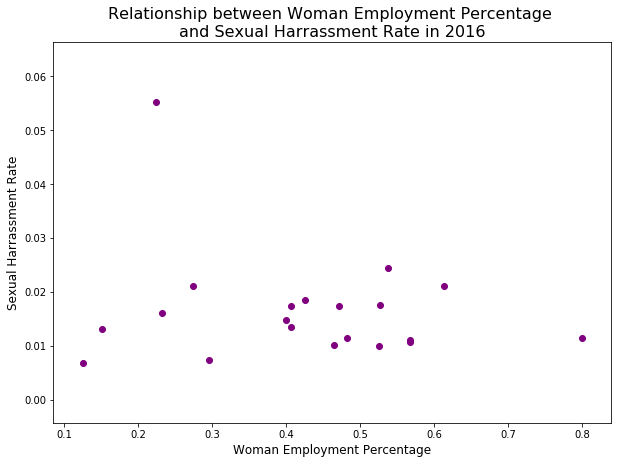

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(df['women_percentage'], df['SH rate'], c='purple')

plt.title('Relationship between Woman Employment Percentage \nand Sexual Harrassment Rate in 2016', fontsize = 16)
plt.xlabel('Woman Employment Percentage', fontsize = 12)
plt.ylabel('Sexual Harrassment Rate', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

Then we want to fit a line to explain the relationship between such two variables.
The functional form of this model is:
$ \mathrm{r}_i = \beta_0 + \beta_1\mathrm{p}_i + \epsilon_i$

where $\beta_0$ and $\beta_1$ are the intercept and slope parameter respectively. 

In [23]:
y = df['SH rate']
X = df['women_percentage']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit() 


In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                SH rate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.6362
Date:                Mon, 07 May 2018   Prob (F-statistic):              0.435
Time:                        23:31:00   Log-Likelihood:                 64.057
No. Observations:                  20   AIC:                            -124.1
Df Residuals:                      18   BIC:                            -122.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0213      0.006      3.313      0.004       0.008       0.035
women_percentage    -0.0113      0.014     -0.798      0.435      -0.041       0.018
==============================================================================
Omnibus:                       29.100   Durbin-Watson:                   2.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.291
Skew:                           2.378   Prob(JB):                     5.98e-13
Kurtosis:                       9.704   Cond. No.                         7.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the model coefficients (the coef column), we can write that the model fitted in this case is the line $ \widehat{\mathrm{r}} = 0.0213 + (-0.0113)\widehat{\mathrm{p}} $

Then we plot the line on the data.

In [25]:
xVals = np.linspace(0.1, 0.8, 1000) 
yVals = 0.0213+(-0.0113)*xVals

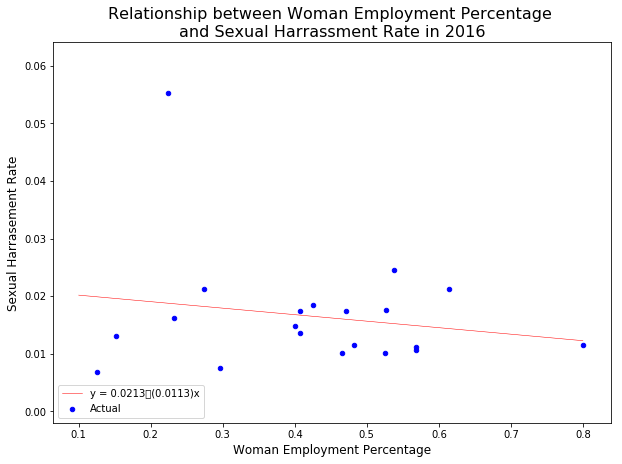

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(df['women_percentage'], df['SH rate'], s=20, c='blue', label='Actual')
plt.plot(xVals, yVals, 'r-', lw=0.5, label='y = 0.0213－(0.0113)x')
plt.plot()

plt.title('Relationship between Woman Employment Percentage \nand Sexual Harrassment Rate in 2016', fontsize = 16)
plt.xlabel('Woman Employment Percentage', fontsize = 12)
plt.ylabel('Sexual Harrasement Rate', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.legend(loc='lower left', fontsize = 10);

The line shows that there is a slightly negative relationship between women workforce and sexual harrassment rate. However, the points are distributed sparsely around the line. So it is not very convincing to conclude that a higher women workforce will result in a lower sexual harrassment rate. 

Now we will do the same procedure for average hourly wage.

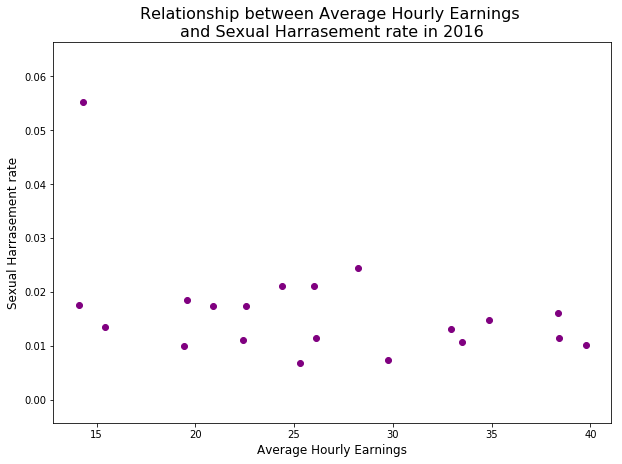

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(df['avg_hrly_earnings'], df['SH rate'], c='purple')

plt.title('Relationship between Average Hourly Earnings \nand Sexual Harrasement rate in 2016', fontsize = 16)
plt.xlabel('Average Hourly Earnings', fontsize = 12)
plt.ylabel('Sexual Harrasement rate', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [28]:
y = df['SH rate']
X = df['avg_hrly_earnings']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()   

In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                SH rate   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3.669
Date:                Mon, 07 May 2018   Prob (F-statistic):             0.0715
Time:                        23:31:05   Log-Likelihood:                 65.564
No. Observations:                  20   AIC:                            -127.1
Df Residuals:                      18   BIC:                            -125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0304      0.008      4.025      0.001       0.015       0.046
avg_hrly_earnings    -0.0005      0.000     -1.915      0.071      -0.001     5.1e-05
==============================================================================
Omnibus:                       24.123   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.073
Skew:                           2.058   Prob(JB):                     8.90e-09
Kurtosis:                       8.249   Cond. No.                         96.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can write that the model fitted in this case is the line $ \widehat{\mathrm{r}} = 0.0304 + (-0.0005)\widehat{\mathrm{p}} $ and plot the line upon the data.

In [30]:
xVals = np.linspace(10, 40, 1000) 
yVals = 0.0304+(-0.0005)*xVals

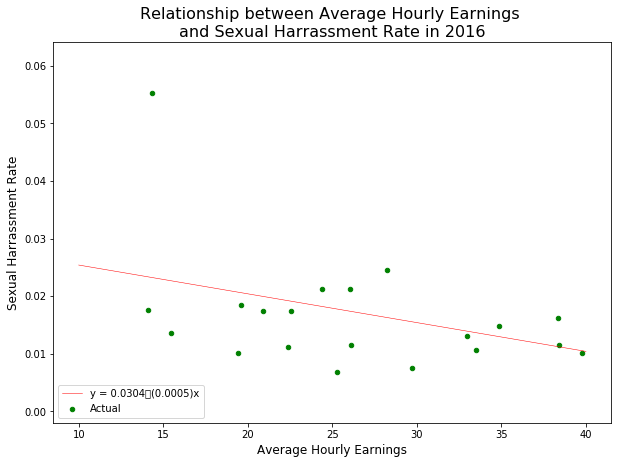

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(df['avg_hrly_earnings'], df['SH rate'], s=20, c='green', label='Actual')
plt.plot(xVals, yVals, 'r-', lw=0.5, label='y = 0.0304－(0.0005)x')
plt.plot()

plt.title('Relationship between Average Hourly Earnings \nand Sexual Harrassment Rate in 2016', fontsize = 16)
plt.xlabel('Average Hourly Earnings', fontsize = 12)
plt.ylabel('Sexual Harrassment Rate', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.legend(loc='lower left', fontsize = 10);

The line shows that there is a slightly negative relationship between average hourly wage and sexual harrassment rate. However, the points are distributed sparsely around the line. So it is not very convincing to conclude that a well paid industry will result in a lower sexual harrassment rate. 

## Conclusion

The hypothesis tests show:<br>
1. no difference between the sexual harrassment rate of high-wage industries and that of low-wage industries.<br>
2. no difference between the sexual harrassment rate of high-women-workforce industries and that of low-women-workforce industries. <br>
<br>

The linear regression shows: <br>
1. There is a slightly negative relationship between wage and sexual harrassment rate. However, such relation is not very convincing since the data points are distributed sparsely around the line. <br>
2. There is a slightly negative relationship between women workforce and sexual harrassment rate. However, such relation is not very convincing since the data points are distributed sparsely around the line. <br>
